In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_excel('Concrete_Data.xlsx')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## EDA

In [4]:
df.duplicated().sum()

25

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
# The new shape of the data is
df.shape

(1005, 9)

### Data Preprocessing

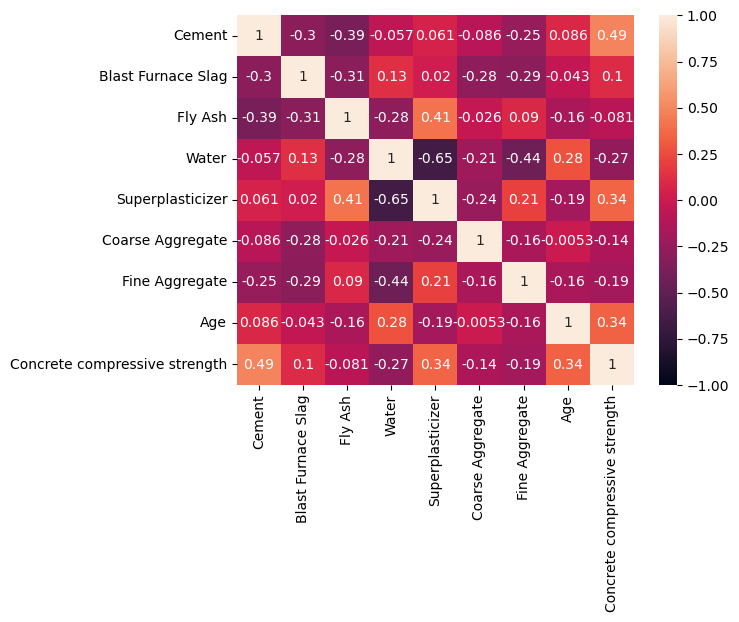

In [7]:
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [8]:
## Univariate Analysis and Bivariate Analysis

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [10]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

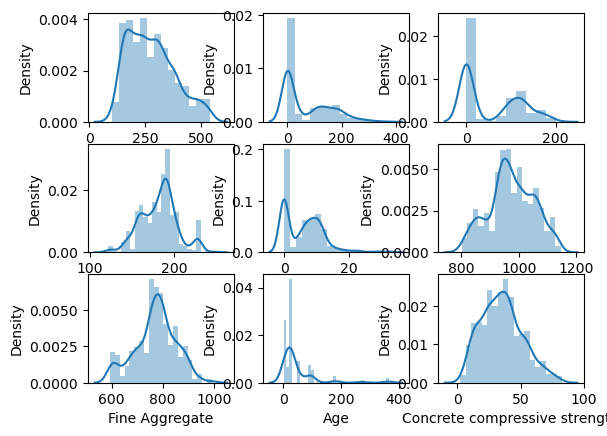

In [11]:
#for Univariate analysis we can make Distplot
nrows = 3
ncols = 3
iterator =1
for i in df.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(df[i])
    iterator+=1
    

In [12]:
# Lets rename the target column for better handling
df.rename(columns = {'Concrete compressive strength':'CCS'},inplace=True)

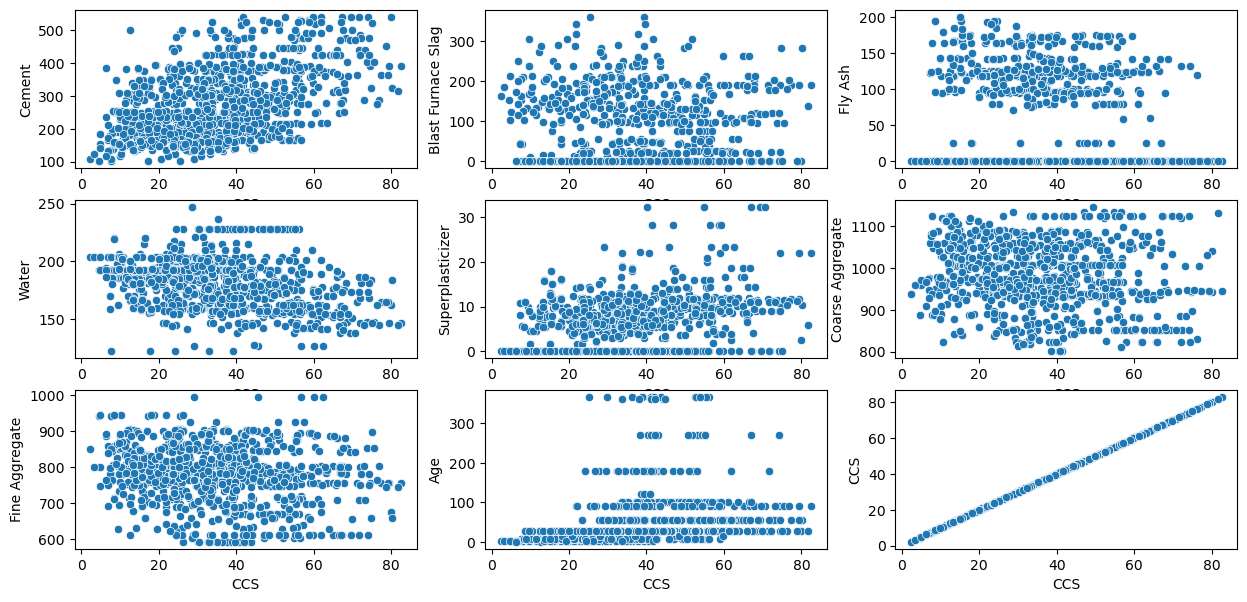

In [13]:
 #For bivariate analysis we can make scatter plot
plt.figure(figsize=(15,7))
nrows = 3
ncols = 3
iterator =1
for i in df.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(y = df[i],x=df['CCS'])
    iterator+=1

In [14]:
## Treat Anamalies (missing values and outliers) (for Linear model we have to do this tep)

In [15]:
df.isnull().sum() # no missing values

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
CCS                   0
dtype: int64

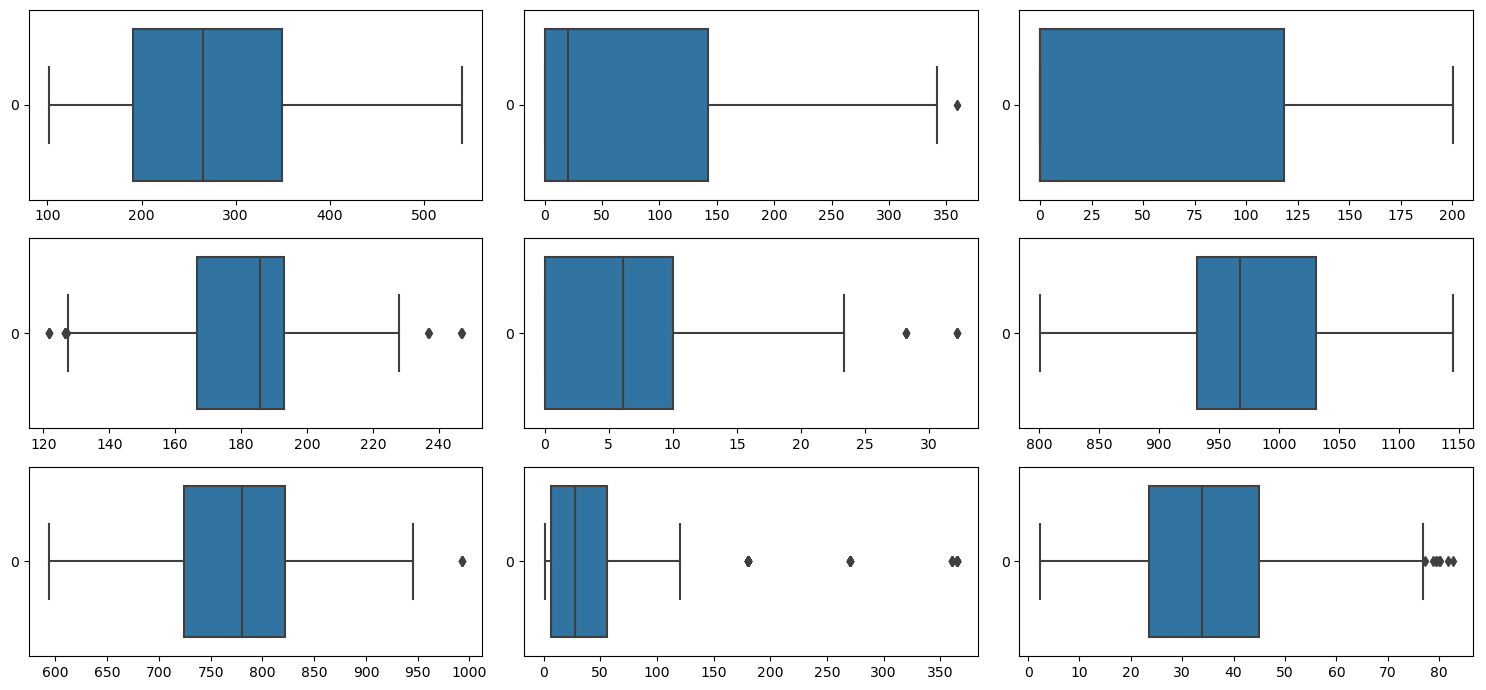

In [16]:
# Outliers--> Boxplot
plt.figure(figsize=(15,7))
nrows = 3
ncols = 3
iterator =1
for i in df.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(df[i],orient='h')
    iterator+=1
plt.tight_layout()
plt.show()

In [18]:
# For model Evaluation we now train-test-split,transformation afterwards

In [19]:
from sklearn.model_selection import train_test_split

In [124]:
X = df.drop(columns='CCS')
y = df.CCS

X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=123)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(753, 8) (252, 8) (753,) (252,)


### Feature Extraction

In [22]:
# Feature Transformation

## ASSUMPTIONS OF LINEAR REGRESSION MODEL

### Modeling

In [23]:
# Check for assumptions
#1. Target must be numeric

In [24]:
#2. Check for Multicollineaity
# we will use VIF to check the collinearity between Water and Superplastisixer 
#as shown by the heatmap

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
vif_list = []
for i in range(X_train.shape[1]):
    vif_list.append(variance_inflation_factor(X_train.values,i))
pd.DataFrame({'Features Names':X_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features Names,VIF
5,Coarse Aggregate,86.150071
3,Water,82.989828
6,Fine Aggregate,76.180942
0,Cement,15.444723
4,Superplasticizer,5.071015
2,Fly Ash,4.066274
1,Blast Furnace Slag,3.298450
7,Age,1.696468


In [31]:
# as we can see that the features Coarse Aggregate, Water, Fine Aggregate,
# Cement has high multicollinearity.

In [32]:
# lets build a base model
import statsmodels.api as sma

In [36]:
model = sma.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CCS   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              1222.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                        12:55:20   Log-Likelihood:                         -2835.1
No. Observations:                 753   AIC:                                      5686.
Df Residuals:                     745   BIC:                                      5723.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cement                 0.1091      0.005     21.754      0.000       0.099       0.119
Blast Furnace Slag     0.0930      0.006     15.101      0.000       0.081       0.105
Fly Ash                0.0756      0.009      8.070      0.000       0.057       0.094
Water                 -0.1756      0.019     -9.263      0.000      -0.213      -0.138
Superplasticizer       0.3539      0.104      3.417      0.001       0.151       0.557
Coarse Aggregate       0.0102      0.004      2.815      0.005       0.003       0.017
Fine Aggregate         0.0116      0.004      2.699      0.007       0.003       0.020
Age                    0.1125      0.006     18.007      0.000       0.100       0.125
==============================================================================
Omnibus:                        3.284   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.204
Skew:                          -0.159   Prob(JB):                        0.202
Kurtosis:                       3.027   Cond. No.                         353.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# we have to add the intercept term to this model using sma
X_train_c = sma.add_constant(X_train)
X_test_c = sma.add_constant(X_test)

# new model with intercept now becomes
base_model = sma.OLS(y_train,X_train_c).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     136.8
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          1.22e-140
Time:                        12:57:22   Log-Likelihood:                -2835.0
No. Observations:                 753   AIC:                             5688.
Df Residuals:                     744   BIC:                             5730.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.6116     32.252     -0.453      0.651     -77.928      48.705
Cement                 0.1132      0.010     10.937      0.000       0.093       0.133
Blast Furnace Slag     0.0978      0.012      8.066      0.000       0.074       0.122
Fly Ash                0.0808      0.015      5.433      0.000       0.052       0.110
Water                 -0.1552      0.049     -3.165      0.002      -0.251      -0.059
Superplasticizer       0.3718      0.111      3.353      0.001       0.154       0.589
Coarse Aggregate       0.0150      0.011      1.341      0.180      -0.007       0.037
Fine Aggregate         0.0172      0.013      1.320      0.187      -0.008       0.043
Age                    0.1127      0.006     17.998      0.000       0.100       0.125
==============================================================================
Omnibus:                        3.406   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                3.307
Skew:                          -0.161   Prob(JB):                        0.191
Kurtosis:                       3.041   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# To treat multicollinearity--> because of Water and Cement - 0.056
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
Cement,1.000000,-0.303301,-0.385618,-0.056583,0.061296,-0.086212,-0.245379,0.086349,0.488283
Blast Furnace Slag,-0.303301,1.000000,-0.312342,0.130295,0.019902,-0.277558,-0.289676,-0.042759,0.103370
Fly Ash,-0.385618,-0.312342,1.000000,-0.283372,0.414055,-0.026485,0.090229,-0.158940,-0.080648
Water,-0.056583,0.130295,-0.283372,1.000000,-0.646875,-0.212495,-0.444888,0.279269,-0.269606
Superplasticizer,0.061296,0.019902,0.414055,-0.646875,1.000000,-0.242031,0.207794,-0.194094,0.344225
Coarse Aggregate,-0.086212,-0.277558,-0.026485,-0.212495,-0.242031,1.000000,-0.162212,-0.005263,-0.144710
Fine Aggregate,-0.245379,-0.289676,0.090229,-0.444888,0.207794,-0.162212,1.000000,-0.156572,-0.186457
Age,0.086349,-0.042759,-0.158940,0.279269,-0.194094,-0.005263,-0.156572,1.000000,0.337371
CCS,0.488283,0.103370,-0.080648,-0.269606,0.344225,-0.144710,-0.186457,0.337371,1.000000


In [40]:
# Instead of dropping water and cement we can take cement/water ratio
# for Coarse and Fine Aggregates we can take the ratio of both these aggregates
# lets see what happens after building the final model with this feature engineering

In [44]:
# Now lets import the data again because we have already done train_test_split on the data before

In [43]:
df1= pd.read_excel('Concrete_Data.xlsx')
df1

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [56]:
df1.rename(columns={'Concrete compressive strength':'CCS'},inplace=True)

In [57]:
# 1. Cement to Water ratio
df1['Cement_Water_Ratio'] = df1['Cement']/df1['Water']
df1

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS,Cement_Water_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,3.333333
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,3.333333
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,1.458333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,1.458333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,1.034375
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,1.538976
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,1.643878
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,0.770628
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,0.906036


In [63]:
df1.drop(columns=['Cement','Water'],inplace=True)

In [64]:
X = df1.drop(columns='CCS')
y = df1.CCS

X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=123)

In [65]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(772, 7) (258, 7) (772,) (258,)


In [66]:
vif_list = []
for i in range(X_train.shape[1]):
    vif_list.append(variance_inflation_factor(X_train.values,i))
pd.DataFrame({'Features Names':X_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features Names,VIF
3,Coarse Aggregate,73.504469
4,Fine Aggregate,58.797980
6,Cement_Water_Ratio,12.964054
2,Superplasticizer,4.682533
1,Fly Ash,3.803487
0,Blast Furnace Slag,2.527403
5,Age,1.583506


In [125]:
# VIF is high for Coarse and Fine Aggregates

In [72]:
X_train_c = sma.add_constant(X_train)
X_test_c = sma.add_constant(X_test)

# new model with intercept now becomes
base_model = sma.OLS(y_train,X_train_c).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     169.6
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          7.03e-151
Time:                        13:16:00   Log-Likelihood:                -2908.1
No. Observations:                 772   AIC:                             5832.
Df Residuals:                     764   BIC:                             5869.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -30.7275      9.670     -3.178      0.002     -49.710     -11.745
Blast Furnace Slag     0.0871      0.007     12.035      0.000       0.073       0.101
Fly Ash                0.0766      0.010      7.380      0.000       0.056       0.097
Superplasticizer       0.2708      0.103      2.618      0.009       0.068       0.474
Coarse Aggregate       0.0125      0.006      2.242      0.025       0.002       0.024
Fine Aggregate         0.0083      0.006      1.330      0.184      -0.004       0.020
Age                    0.1181      0.007     17.864      0.000       0.105       0.131
Cement_Water_Ratio    19.3515      1.000     19.342      0.000      17.387      21.316
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.189
Skew:                          -0.179   Prob(JB):                        0.123
Kurtosis:                       3.040   Cond. No.                     3.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# Now lets do the next feature selection ratio of Coarse and Fine Aggregates

In [74]:
df1['Coarse Fine ratio'] = df1['Coarse Aggregate']/df1['Fine Aggregate']
df1.drop(columns=['Coarse Aggregate','Fine Aggregate'],inplace=True)

In [78]:
df1

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,CCS,Cement_Water_Ratio,Coarse Fine ratio
0,0.0,0.0,2.5,28,79.986111,3.333333,1.538462
1,0.0,0.0,2.5,28,61.887366,3.333333,1.560651
2,142.5,0.0,0.0,270,40.269535,1.458333,1.569024
3,142.5,0.0,0.0,365,41.052780,1.458333,1.569024
4,132.4,0.0,0.0,360,44.296075,1.034375,1.185221
...,...,...,...,...,...,...,...
1025,116.0,90.3,8.9,28,44.284354,1.538976,1.132500
1026,0.0,115.6,10.4,28,31.178794,1.643878,1.005532
1027,139.4,108.6,6.1,28,23.696601,0.770628,1.144103
1028,186.7,0.0,11.3,28,32.768036,0.906036,1.254405


In [80]:
X = df1.drop(columns='CCS')
y = df1.CCS

X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=123)

In [81]:
vif_list = []
for i in range(X_train.shape[1]):
    vif_list.append(variance_inflation_factor(X_train.values,i))
pd.DataFrame({'Features Names':X_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features Names,VIF
5,Coarse Fine ratio,20.122473
4,Cement_Water_Ratio,14.995556
2,Superplasticizer,4.944901
1,Fly Ash,4.111889
0,Blast Furnace Slag,2.996416
3,Age,1.628358


In [126]:
# Coarse Fine ratio has Higher VIF and neither it is significant

In [82]:
X_train_c = sma.add_constant(X_train)
X_test_c = sma.add_constant(X_test)  

base_model = sma.OLS(y_train,X_train_c).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          7.07e-151
Time:                        13:20:59   Log-Likelihood:                -2910.8
No. Observations:                 772   AIC:                             5836.
Df Residuals:                     765   BIC:                             5868.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.0635      3.055     -3.294      0.001     -16.062      -4.065
Blast Furnace Slag     0.0782      0.006     13.395      0.000       0.067       0.090
Fly Ash                0.0688      0.010      7.231      0.000       0.050       0.087
Superplasticizer       0.3157      0.099      3.189      0.001       0.121       0.510
Age                    0.1147      0.006     17.865      0.000       0.102       0.127
Cement_Water_Ratio    18.4829      0.901     20.525      0.000      16.715      20.251
Coarse Fine ratio      0.1889      2.279      0.083      0.934      -4.285       4.662
==============================================================================
Omnibus:                        3.372   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                3.297
Skew:                          -0.160   Prob(JB):                        0.192
Kurtosis:                       3.025   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# Course/ Fine ratio is making no sense in the data except the condition number

In [87]:
df1.drop(columns='Coarse Fine ratio',inplace=True)

In [88]:
df1

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,CCS,Cement_Water_Ratio
0,0.0,0.0,2.5,28,79.986111,3.333333
1,0.0,0.0,2.5,28,61.887366,3.333333
2,142.5,0.0,0.0,270,40.269535,1.458333
3,142.5,0.0,0.0,365,41.052780,1.458333
4,132.4,0.0,0.0,360,44.296075,1.034375
...,...,...,...,...,...,...
1025,116.0,90.3,8.9,28,44.284354,1.538976
1026,0.0,115.6,10.4,28,31.178794,1.643878
1027,139.4,108.6,6.1,28,23.696601,0.770628
1028,186.7,0.0,11.3,28,32.768036,0.906036


In [89]:
X = df1.drop(columns='CCS')
y = df1.CCS

X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=123)

In [90]:
vif_list = []
for i in range(X_train.shape[1]):
    vif_list.append(variance_inflation_factor(X_train.values,i))
pd.DataFrame({'Features Names':X_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features Names,VIF
2,Superplasticizer,3.402975
4,Cement_Water_Ratio,3.046448
1,Fly Ash,1.916403
0,Blast Furnace Slag,1.530922
3,Age,1.499456


In [91]:
# As we can see that the VIF's have improved when dropping Coarse and Fine Aggregate

In [92]:
X_train_c = sma.add_constant(X_train)
X_test_c = sma.add_constant(X_test)  

base_model = sma.OLS(y_train,X_train_c).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     235.3
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          4.40e-152
Time:                        13:24:44   Log-Likelihood:                -2910.8
No. Observations:                 772   AIC:                             5834.
Df Residuals:                     766   BIC:                             5862.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.8573      1.773     -5.560      0.000     -13.338      -6.377
Blast Furnace Slag     0.0783      0.006     13.771      0.000       0.067       0.090
Fly Ash                0.0690      0.009      7.440      0.000       0.051       0.087
Superplasticizer       0.3126      0.092      3.409      0.001       0.133       0.493
Age                    0.1148      0.006     18.006      0.000       0.102       0.127
Cement_Water_Ratio    18.5040      0.863     21.436      0.000      16.809      20.199
==============================================================================
Omnibus:                        3.361   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.284
Skew:                          -0.159   Prob(JB):                        0.194
Kurtosis:                       3.027   Cond. No.                         633.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Assumptions: Linearity of model
# resid plot between predictors and residuals

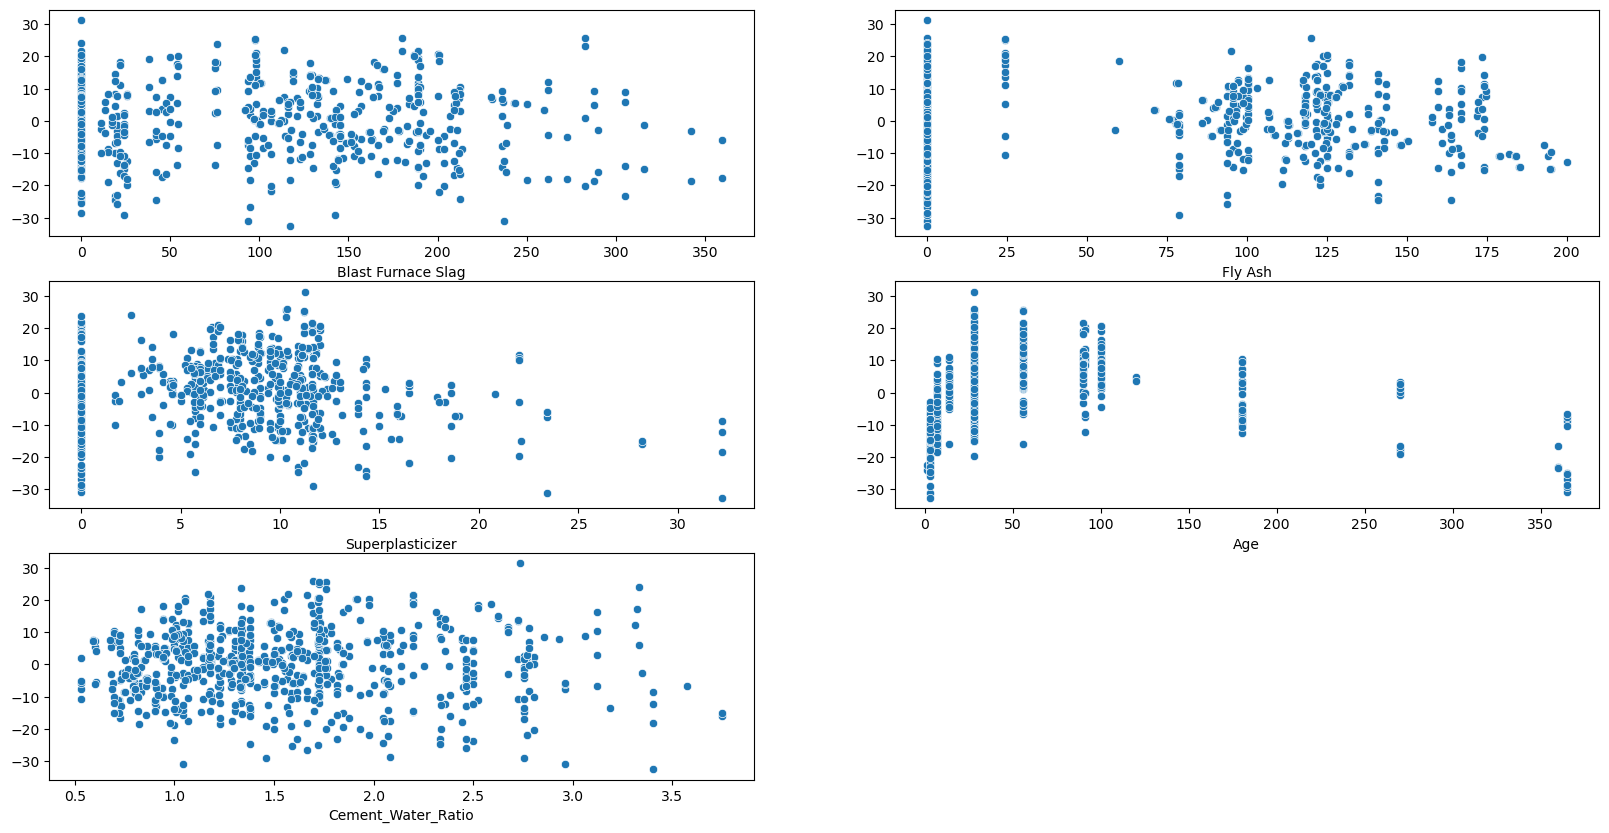

In [100]:
plt.figure(figsize=(20,10))
nrows=3
ncols=2
iterator=1
for i in X_train.columns:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(x=X_train[i],y = base_model.resid)
    iterator+=1
plt.show()

In [101]:
# given the scatter plot is not clear, we will apply rainbow test to check the linearity

In [102]:
from statsmodels.stats.diagnostic import linear_rainbow

In [103]:
# Ho: Variables are Linear
# H1: Variables are non-linear

p_val = linear_rainbow(base_model)[1]

In [104]:
if p_val<0.05:
    print('Reject Ho: Variables are non-linear')
else:
    print('Fail to reject Ho: Variables are Linear')

Fail to reject Ho: Variables are Linear


In [105]:
# Assumption: Homoscedasticity-> residuals have equal variances

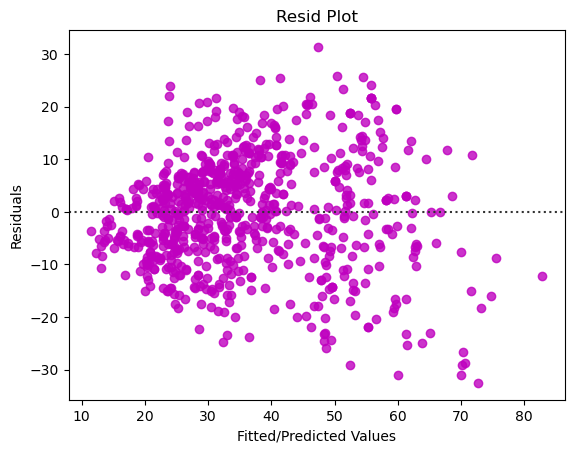

In [107]:
# We make a resid plot
sns.residplot(x = base_model.fittedvalues,y=base_model.resid,color='m')
plt.xlabel('Fitted/Predicted Values')
plt.ylabel('Residuals')
plt.title('Resid Plot')
plt.show()

In [108]:
# Lets apply Breusch pagan test to statistically test for homoscedasticy

In [112]:
# Ho: Residuals are Homoscedastic
# h1: Residuals are Heteroscedastic

In [110]:
sma.stats.diagnostic.het_breuschpagan(resid= base_model.resid,exog_het=base_model.model.exog)

(115.58012879417744,
 2.7068269111203493e-23,
 26.97492338058111,
 3.539600669244978e-25)

In [111]:
p_val = sma.stats.diagnostic.het_breuschpagan(resid= base_model.resid,exog_het=base_model.model.exog)[1]

In [113]:
if p_val<0.05:
    print('Reject Ho: Residuals are Heteroscedastic')
else:
    print('Fail to reject Ho: Residuals are Homoscedastic')

Reject Ho: Residuals are Heteroscedastic


In [115]:
p_val = sma.stats.diagnostic.het_goldfeldquandt(x=X_train_c,y=y_train,drop=0.1)

In [116]:
p_val = sma.stats.diagnostic.het_goldfeldquandt(x=X_train_c,y=y_train,drop=0.1)[1]

In [117]:
if p_val<0.05:
    print('Reject Ho: Residuals are Heteroscedastic')
else:
    print('Fail to reject Ho: Residuals are Homoscedastic')

Fail to reject Ho: Residuals are Homoscedastic


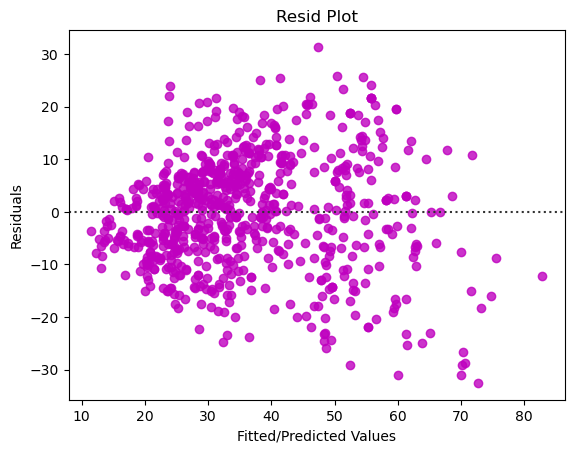

In [118]:
sns.residplot(x = base_model.fittedvalues,y=base_model.resid,color='m')
plt.xlabel('Fitted/Predicted Values')
plt.ylabel('Residuals')
plt.title('Resid Plot')
plt.show()

In [119]:
# Assumption: Residuals Normality
# Apply Q-Q plot

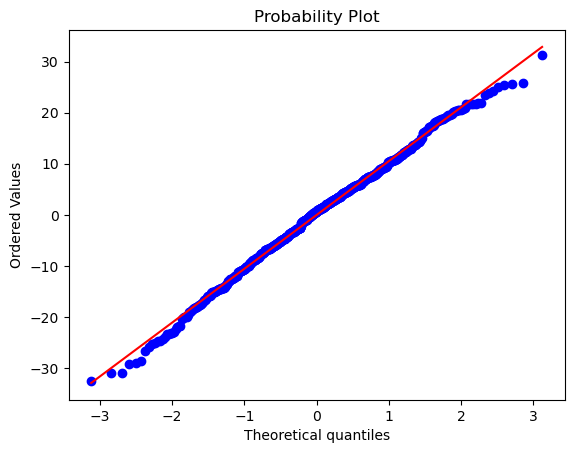

In [120]:
stats.probplot(base_model.resid,plot=plt)
plt.show()

In [121]:
# data residuals are actually lying on the actual line
# to test this we use Shapiro Wilk Test bcz data is less

In [122]:
# Ho: The data is normal
# H1: The data is not normal

p_val = stats.shapiro(base_model.resid)[1]

if p_val<0.05:
    print('Reject Ho: The data is not normal')
else:
    print('Fail to reject Ho: The data is normal')

Fail to reject Ho: The data is normal


In [123]:
# Hence the residual points are normally distributed